In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

In [2]:
df_train = pd.read_csv("data/train_df.csv")
df_test = pd.read_csv("data/test_df.csv")

**1. Data observation**

In [ ]:
print(df_train.head())

                      Date  Electric_Consumption  Factor_A   Factor_B  \
0  2023-01-01T00:00:00.000              0.000000  1.242130  28.419739   
1  2023-01-01T01:00:00.000              0.000000  1.861285  29.840759   
2  2023-01-01T02:00:00.000              0.000000  4.212674  32.778036   
3  2023-01-01T03:00:00.000              0.000000  4.025251  32.624700   
4  2023-01-01T04:00:00.000             -0.000267  3.122659  31.931245   

    Factor_C   Factor_D  Factor_E  Factor_F  
0  13.720397  79.840600       0.0  2.386157  
1  12.537668  86.424903       0.0  1.473256  
2   9.408667  72.082793       0.0  1.583711  
3   9.035601  73.825705       0.0  1.706656  
4   9.235502  66.823956       0.0  0.987048  


In [ ]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13872 entries, 0 to 13871
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  13872 non-null  object 
 1   Electric_Consumption  13872 non-null  float64
 2   Factor_A              13872 non-null  float64
 3   Factor_B              13872 non-null  float64
 4   Factor_C              13872 non-null  float64
 5   Factor_D              13872 non-null  float64
 6   Factor_E              13872 non-null  float64
 7   Factor_F              13872 non-null  float64
dtypes: float64(7), object(1)
memory usage: 867.1+ KB
None


In [ ]:
print(df_train.describe())

       Electric_Consumption      Factor_A      Factor_B      Factor_C  \
count          13872.000000  13872.000000  13872.000000  13872.000000   
mean               5.893120      2.262227     19.977867     40.332796   
std                7.355969      1.457234      9.607866     24.324671   
min               -0.009717    -74.220598     -5.422289      3.249366   
25%                0.000000      1.105756     13.088434     20.396742   
50%                0.086858      1.995936     20.187978     34.024351   
75%               13.512742      3.261530     26.994172     57.191932   
max               21.360638      8.392045     44.036205    101.706771   

           Factor_D      Factor_E      Factor_F  
count  13872.000000  13872.000000  13872.000000  
mean     145.005668      0.209435     42.522214  
std       94.993992      1.691576    280.466514  
min    -1380.363752      0.000000      0.000000  
25%      106.883078      0.000000      0.579665  
50%      138.044038      0.000000      1.9

In [ ]:
print((df_train == 0).sum())

Date                        0
Electric_Consumption     5865
Factor_A                    0
Factor_B                    0
Factor_C                    0
Factor_D                    0
Factor_E                13002
Factor_F                 2037
dtype: int64


**2. Exploratory Data Analysis**

Visualisation des données : tendances, saisonnalité, anomalies.

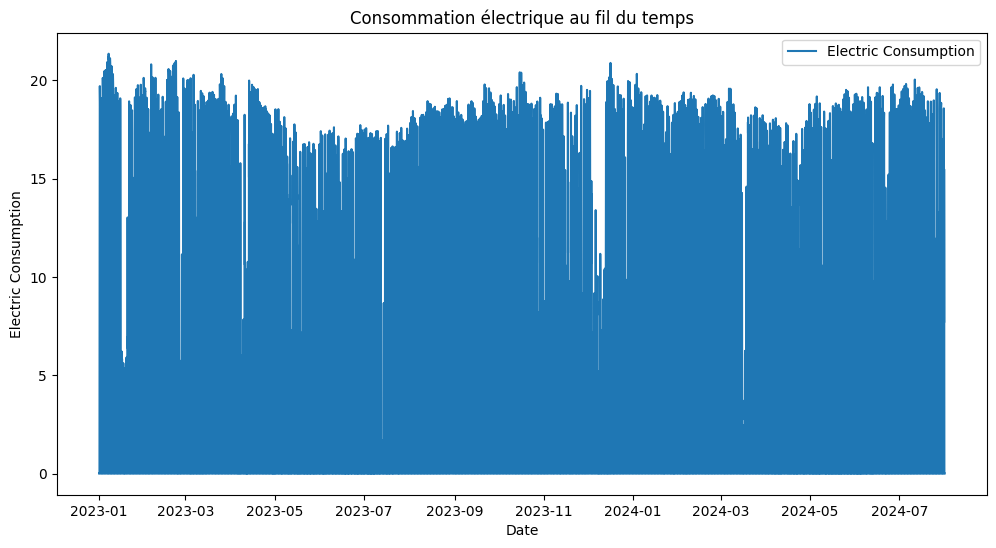

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

df_train['Date'] = pd.to_datetime(df_train['Date'])
df_test['Date'] = pd.to_datetime(df_test['Date'])

df_train.set_index('Date', inplace=True)
df_test.set_index('Date', inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(df_train['Electric_Consumption'], label='Electric Consumption')
plt.title('Consommation électrique au fil du temps')
plt.xlabel('Date')
plt.ylabel('Electric Consumption')
plt.legend()
plt.show()

In [4]:
print(df_train['Electric_Consumption'].describe())

count    13872.000000
mean         5.893120
std          7.355969
min         -0.009717
25%          0.000000
50%          0.086858
75%         13.512742
max         21.360638
Name: Electric_Consumption, dtype: float64


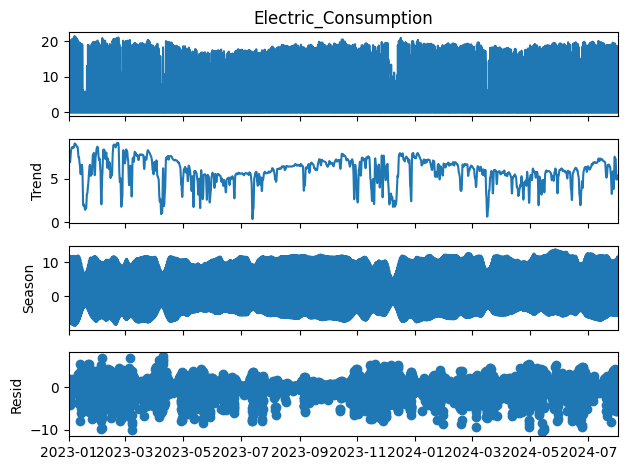

In [5]:
from statsmodels.tsa.seasonal import STL

stl = STL(df_train['Electric_Consumption'], seasonal=13)
result = stl.fit()
result.plot()
plt.show()

In [6]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_train['Electric_Consumption'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -10.80503512416776
p-value: 1.9732026992974456e-19


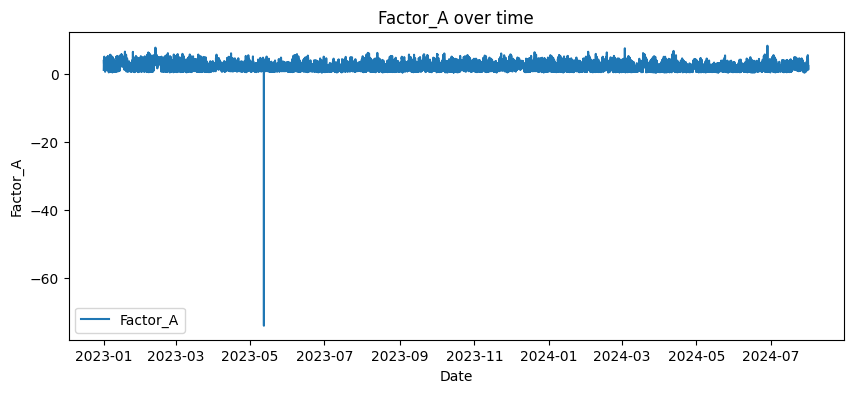

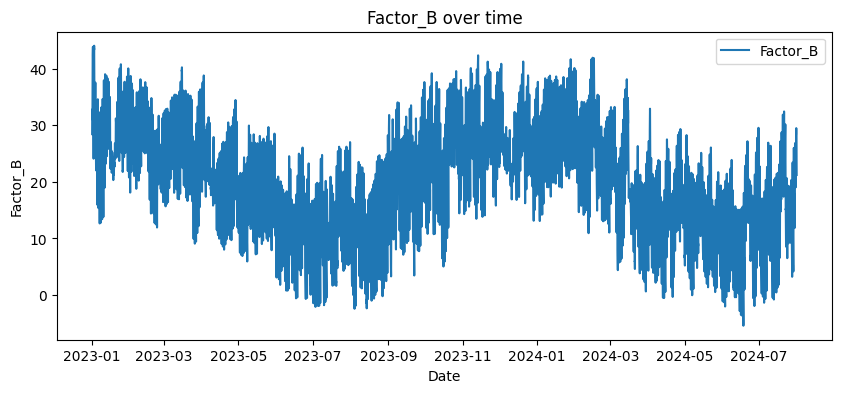

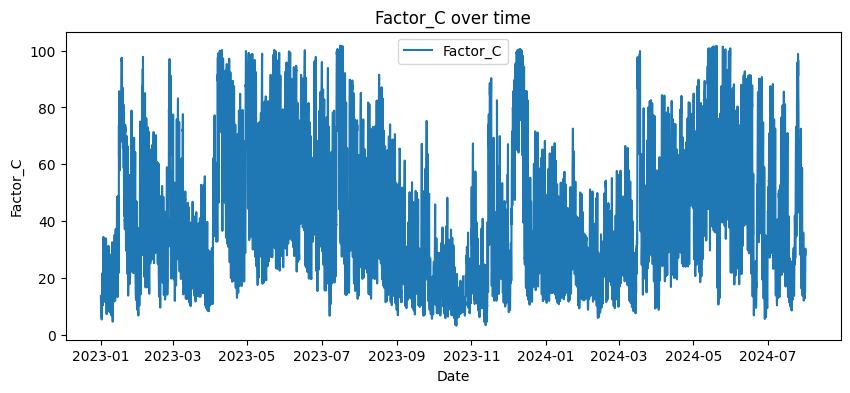

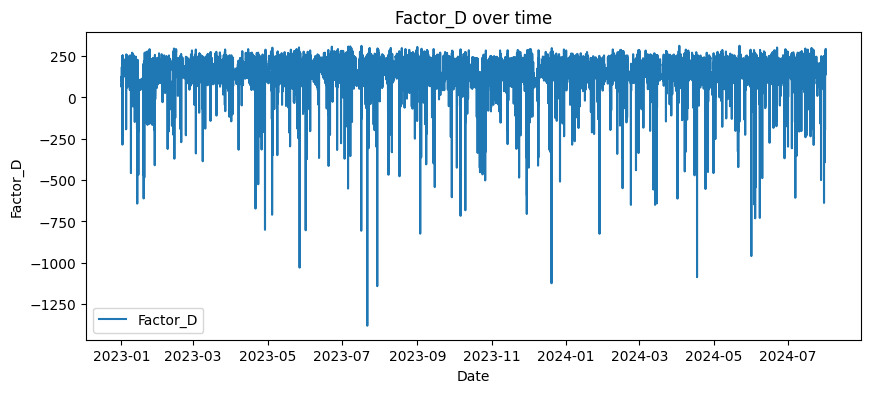

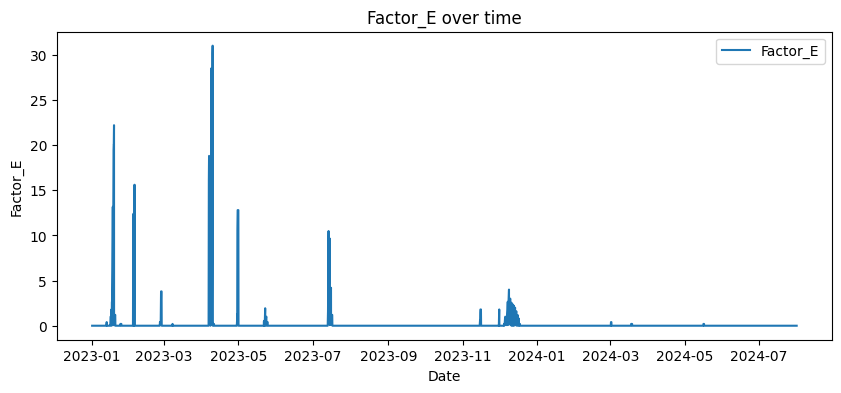

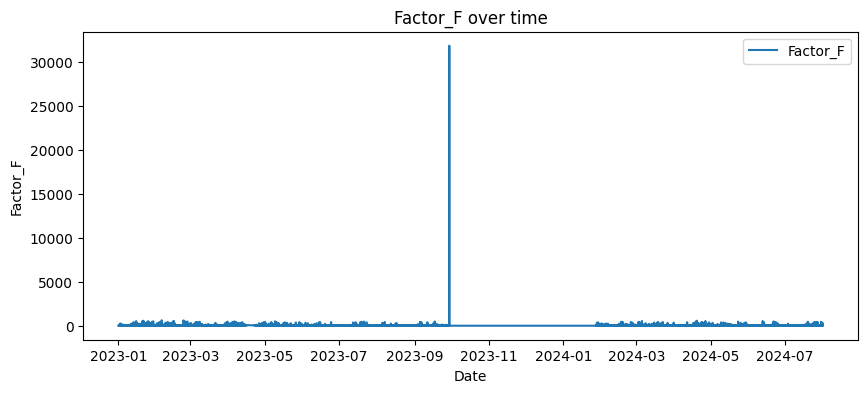

In [7]:
factors = ['Factor_A', 'Factor_B', 'Factor_C', 'Factor_D', 'Factor_E', 'Factor_F']
for factor in factors:
    plt.figure(figsize=(10, 4))
    plt.plot(df_train.index, df_train[factor], label=factor)
    plt.title(f'{factor} over time')
    plt.xlabel('Date')
    plt.ylabel(factor)
    plt.legend()
    plt.show()

In [8]:
corr_matrix = df_train.corr()
print(corr_matrix['Electric_Consumption'].sort_values(ascending=False))

Electric_Consumption    1.000000
Factor_A                0.593693
Factor_B                0.483555
Factor_F                0.139761
Factor_E               -0.059394
Factor_D               -0.148752
Factor_C               -0.479919
Name: Electric_Consumption, dtype: float64


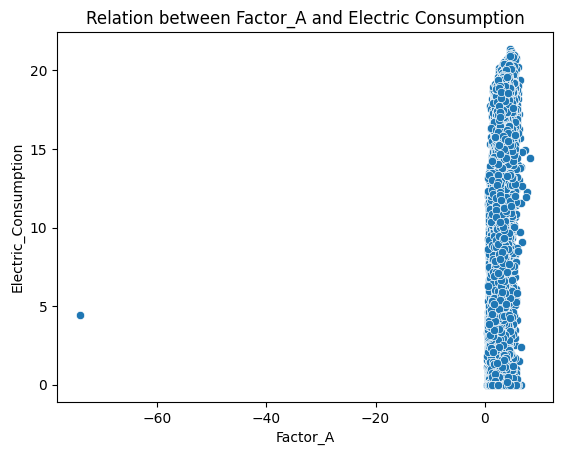

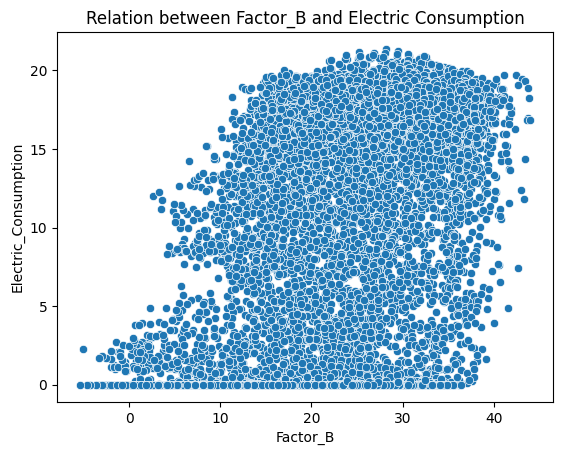

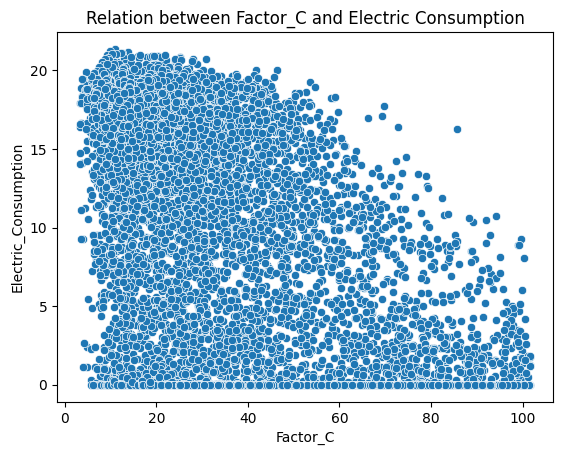

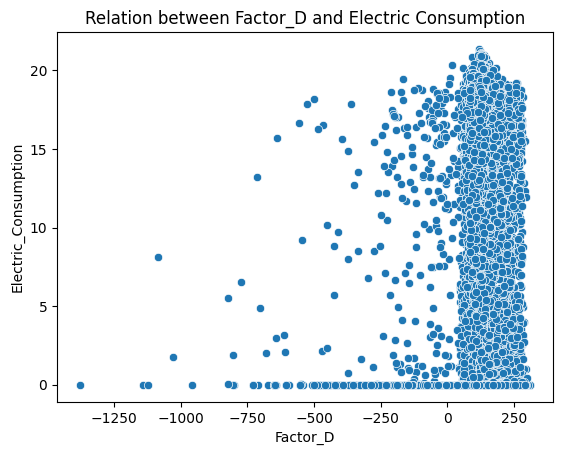

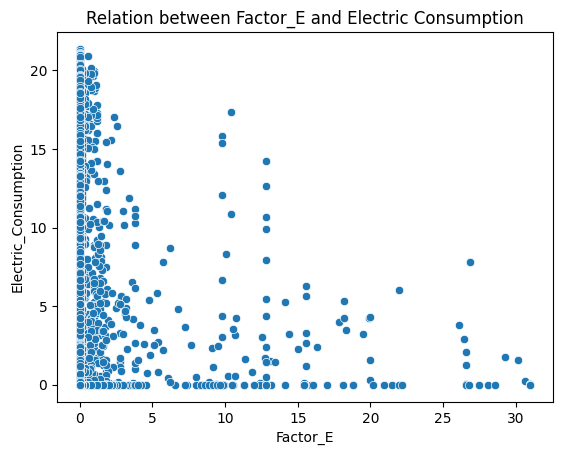

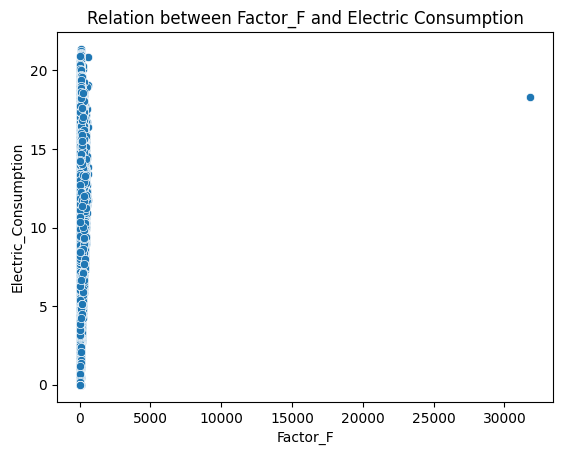

In [9]:
import seaborn as sns

for factor in factors:
    sns.scatterplot(x=df_train[factor], y=df_train['Electric_Consumption'])
    plt.title(f'Relation between {factor} and Electric Consumption')
    plt.show()

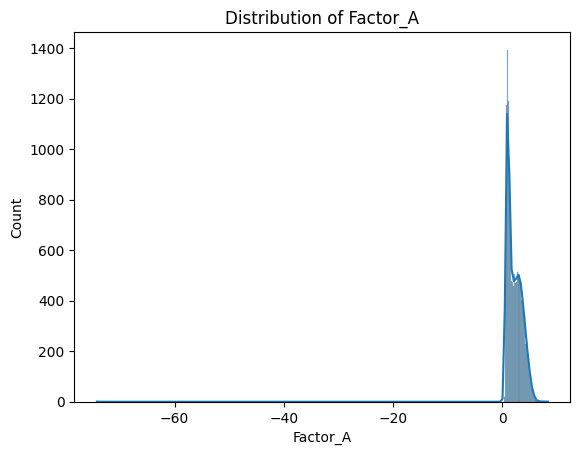

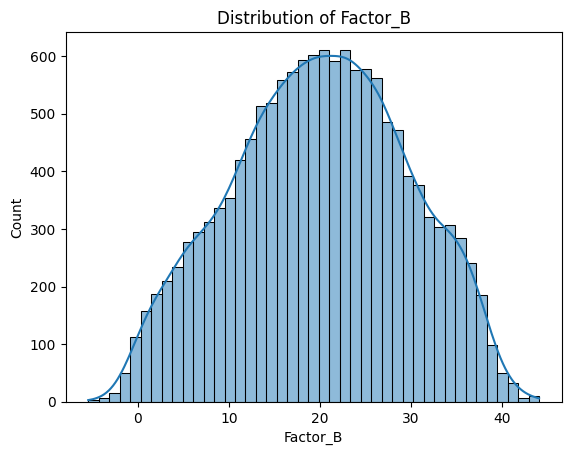

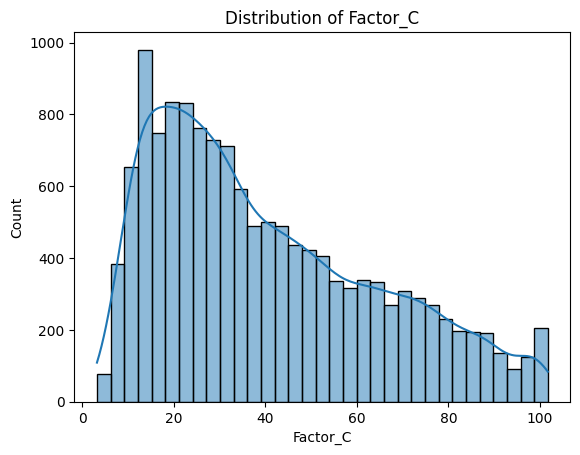

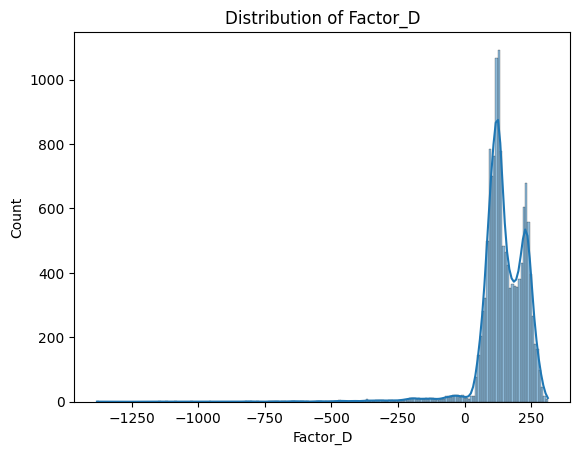

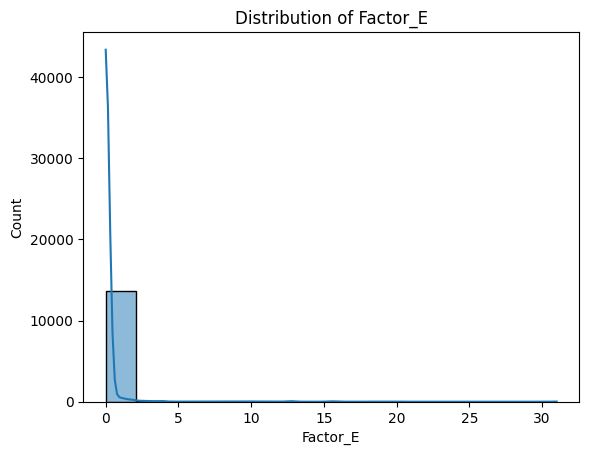

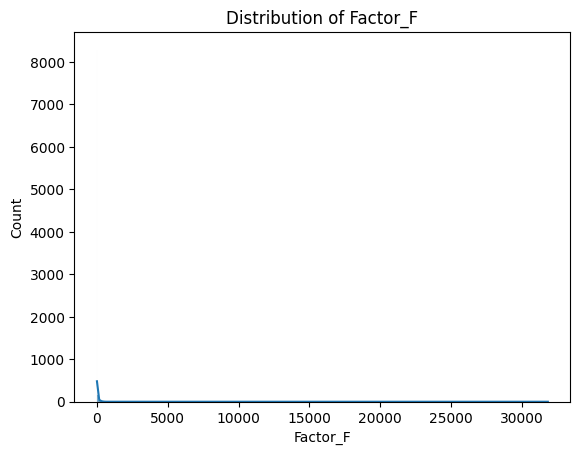

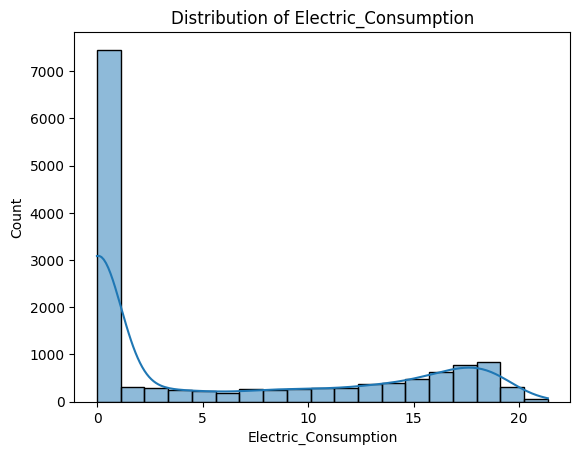

In [10]:
for column in factors + ['Electric_Consumption']:
    sns.histplot(df_train[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

C:\Users\Loïc\AppData\Local\Temp\ipykernel_27864\3128842876.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_train[factor], label='Train', shade=True)
C:\Users\Loïc\AppData\Local\Temp\ipykernel_27864\3128842876.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_test[factor], label='Test', shade=True)


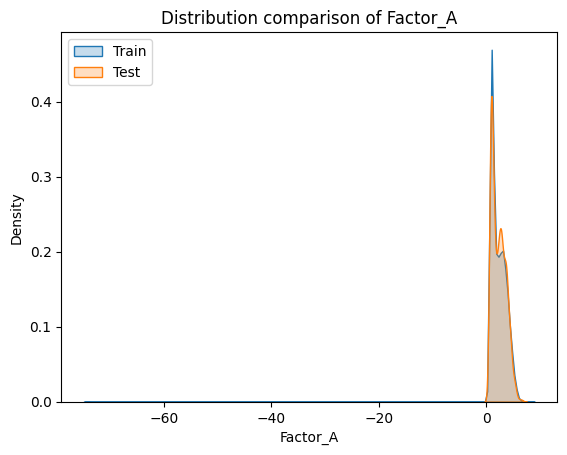

C:\Users\Loïc\AppData\Local\Temp\ipykernel_27864\3128842876.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_train[factor], label='Train', shade=True)
C:\Users\Loïc\AppData\Local\Temp\ipykernel_27864\3128842876.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_test[factor], label='Test', shade=True)


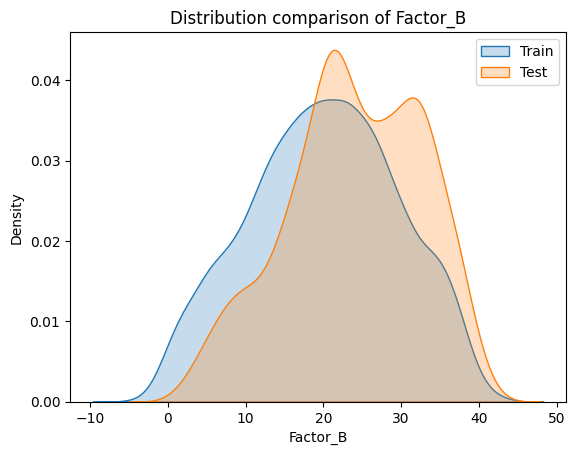

C:\Users\Loïc\AppData\Local\Temp\ipykernel_27864\3128842876.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_train[factor], label='Train', shade=True)
C:\Users\Loïc\AppData\Local\Temp\ipykernel_27864\3128842876.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_test[factor], label='Test', shade=True)


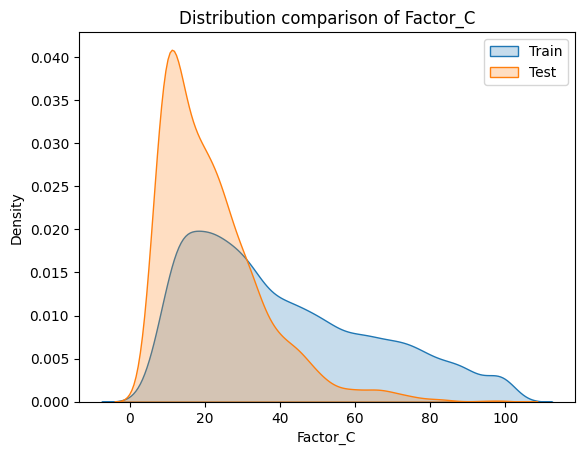

C:\Users\Loïc\AppData\Local\Temp\ipykernel_27864\3128842876.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_train[factor], label='Train', shade=True)
C:\Users\Loïc\AppData\Local\Temp\ipykernel_27864\3128842876.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_test[factor], label='Test', shade=True)


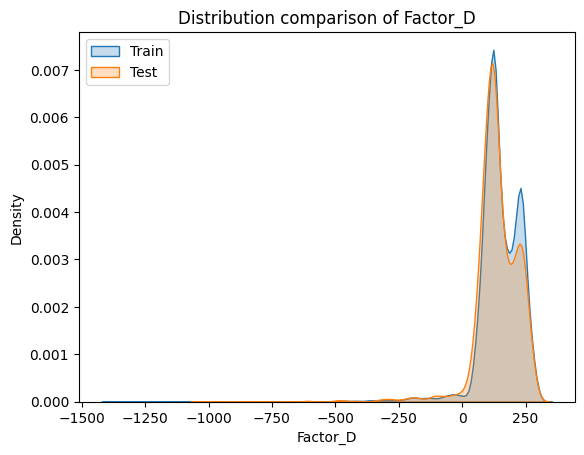

C:\Users\Loïc\AppData\Local\Temp\ipykernel_27864\3128842876.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_train[factor], label='Train', shade=True)
C:\Users\Loïc\AppData\Local\Temp\ipykernel_27864\3128842876.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_test[factor], label='Test', shade=True)


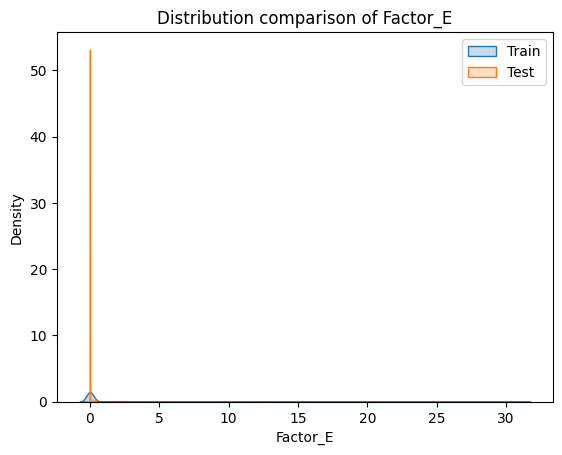

C:\Users\Loïc\AppData\Local\Temp\ipykernel_27864\3128842876.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_train[factor], label='Train', shade=True)
C:\Users\Loïc\AppData\Local\Temp\ipykernel_27864\3128842876.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_test[factor], label='Test', shade=True)


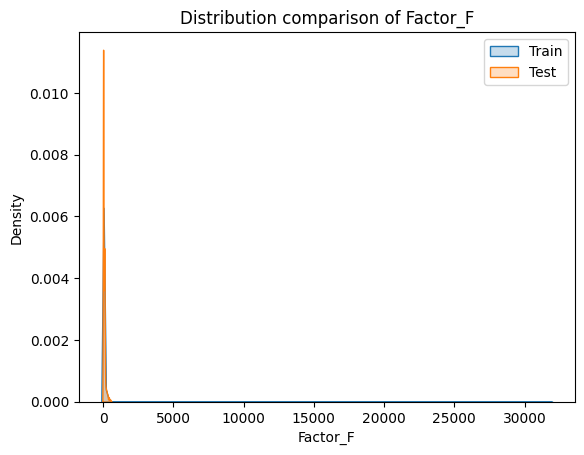

In [11]:
for factor in factors:
    sns.kdeplot(df_train[factor], label='Train', shade=True)
    sns.kdeplot(df_test[factor], label='Test', shade=True)
    plt.title(f'Distribution comparison of {factor}')
    plt.legend()
    plt.show()

**3. Properties Series Analysis**

In [12]:
from statsmodels.tsa.stattools import adfuller

# Test de Dickey-Fuller
result_adf = adfuller(df_train['Electric_Consumption'])
print("ADF Statistic:", result_adf[0])
print("p-value:", result_adf[1])
if result_adf[1] < 0.05:
    print("La série est stationnaire (rejet de l'hypothèse nulle).")
else:
    print("La série n'est pas stationnaire (acceptation de l'hypothèse nulle).")

ADF Statistic: -10.80503512416776
p-value: 1.9732026992974456e-19
La série est stationnaire (rejet de l'hypothèse nulle).


In [13]:
from statsmodels.tsa.stattools import kpss

# Test KPSS
result_kpss = kpss(df_train['Electric_Consumption'], regression='c')  # 'c' pour stationnarité autour d'une constante
print("KPSS Statistic:", result_kpss[0])
print("p-value:", result_kpss[1])
if result_kpss[1] < 0.05:
    print("La série n'est pas stationnaire (rejet de l'hypothèse nulle).")
else:
    print("La série est stationnaire (acceptation de l'hypothèse nulle).")

KPSS Statistic: 0.6966535621285482
p-value: 0.013849676170131978
La série n'est pas stationnaire (rejet de l'hypothèse nulle).


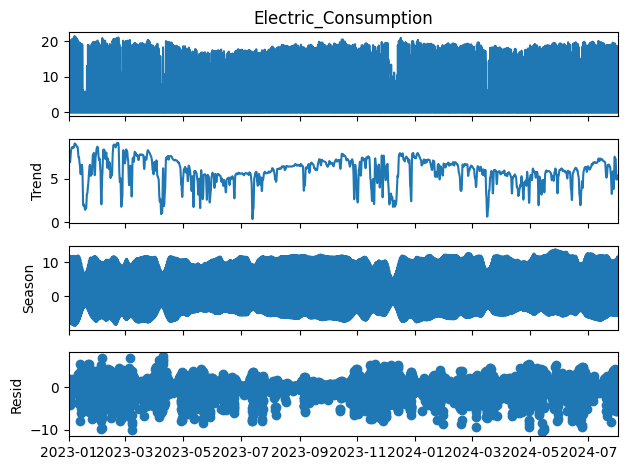

In [14]:
from statsmodels.tsa.seasonal import STL

stl = STL(df_train['Electric_Consumption'], seasonal=13)  # Ajustez `seasonal` selon vos données
result = stl.fit()
result.plot()
plt.show()

In [15]:
df_train['Differenced'] = df_train['Electric_Consumption'].diff()

# Re-testez la stationnarité sur la série différenciée
from statsmodels.tsa.stattools import adfuller, kpss

result_adf_diff = adfuller(df_train['Differenced'].dropna())
print("ADF Statistic (différenciée):", result_adf_diff[0])
print("p-value (différenciée):", result_adf_diff[1])

result_kpss_diff = kpss(df_train['Differenced'].dropna(), regression='c')
print("KPSS Statistic (différenciée):", result_kpss_diff[0])
print("p-value (différenciée):", result_kpss_diff[1])

ADF Statistic (différenciée): -25.064216663235786
p-value (différenciée): 0.0
KPSS Statistic (différenciée): 0.002211489088374654
p-value (différenciée): 0.1


C:\Users\Loïc\AppData\Local\Temp\ipykernel_27864\725169906.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result_kpss_diff = kpss(df_train['Differenced'].dropna(), regression='c')


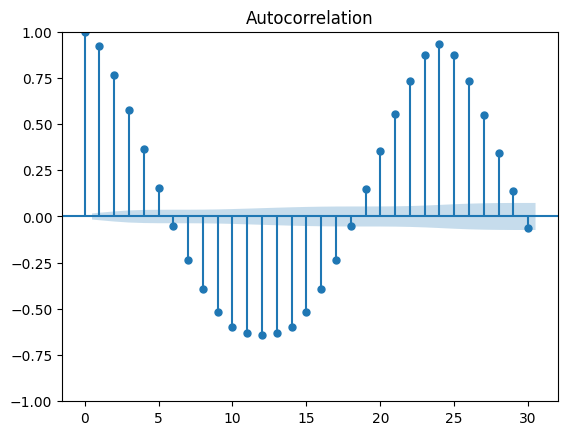

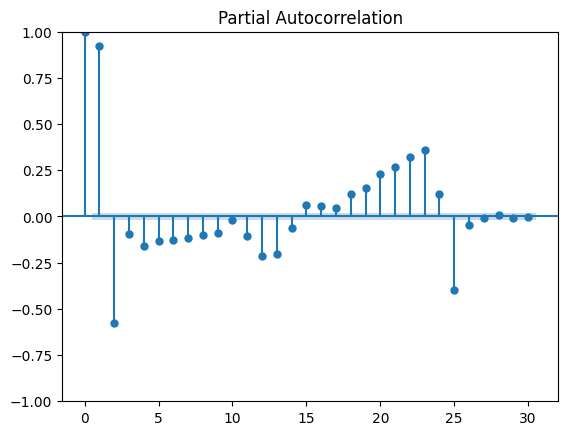

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF
plot_acf(df_train['Electric_Consumption'], lags=30)  # Ajustez les lags
plt.show()

# PACF
plot_pacf(df_train['Electric_Consumption'], lags=30)
plt.show()

In [17]:
from statsmodels.stats.diagnostic import het_arch

# Test ARCH
arch_test = het_arch(df_train['Electric_Consumption'])
print("ARCH Test Statistic:", arch_test[0])
print("p-value:", arch_test[1])
if arch_test[1] < 0.05:
    print("La série présente de l'hétéroscédasticité.")
else:
    print("Pas d'hétéroscédasticité détectée.")

ARCH Test Statistic: 12275.62864206579
p-value: 0.0
La série présente de l'hétéroscédasticité.
